In [195]:
import numpy as np
import pandas as pd
import folium # map rendering library
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from scipy import stats
from scipy.stats import norm, skew #for some statistics

from sklearn import ensemble, tree, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

In [196]:
# The coordinates of Amsterdam center
latitude = 52.372952
longitude = 4.906080

In [235]:
df=pd.read_csv('/content/drive/MyDrive/AMS-Airbnb-price-prediction/data/listings.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20220308023209,2022-03-08,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,...,4.98,4.68,4.82,0363 5F3A 5684 6750 D14D,t,1,0,1,0,1.81
1,20168,https://www.airbnb.com/rooms/20168,20220308023209,2022-03-31,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,59484,https://www.airbnb.com/users/show/59484,...,4.62,4.87,4.49,0363 CBB3 2C10 0C2A 1E29,t,2,0,2,0,2.30
2,27886,https://www.airbnb.com/rooms/27886,20220308023209,2022-03-08,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,https://www.airbnb.com/users/show/97647,...,4.92,4.89,4.79,0363 974D 4986 7411 88D8,t,1,0,1,0,1.84
3,28871,https://www.airbnb.com/rooms/28871,20220308023209,2022-03-08,Comfortable double room,<b>The space</b><br />In a monumental house ri...,"Flower market , Leidseplein , Rembrantsplein",https://a0.muscache.com/pictures/160889/362340...,124245,https://www.airbnb.com/users/show/124245,...,4.94,4.97,4.82,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,2.70
4,29051,https://www.airbnb.com/rooms/29051,20220308023209,2022-03-08,Comfortable single room,This room can also accomodate 2 people. For a...,the street is quite lively especially on weeke...,https://a0.muscache.com/pictures/162009/bd6be2...,124245,https://www.airbnb.com/users/show/124245,...,4.91,4.87,4.75,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,3.98


In [236]:
df.shape

(5732, 74)

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5732 entries, 0 to 5731
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            5732 non-null   int64  
 1   listing_url                                   5732 non-null   object 
 2   scrape_id                                     5732 non-null   int64  
 3   last_scraped                                  5732 non-null   object 
 4   name                                          5732 non-null   object 
 5   description                                   5716 non-null   object 
 6   neighborhood_overview                         4054 non-null   object 
 7   picture_url                                   5732 non-null   object 
 8   host_id                                       5732 non-null   int64  
 9   host_url                                      5732 non-null   o

In [238]:
#check null values
df.isnull().sum()

id                                                0
listing_url                                       0
scrape_id                                         0
last_scraped                                      0
name                                              0
                                               ... 
calculated_host_listings_count                    0
calculated_host_listings_count_entire_homes       0
calculated_host_listings_count_private_rooms      0
calculated_host_listings_count_shared_rooms       0
reviews_per_month                               576
Length: 74, dtype: int64

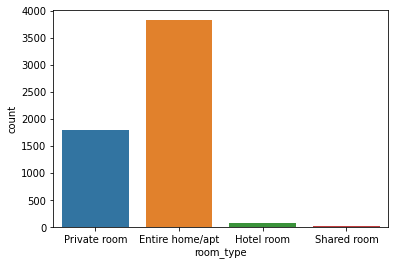

In [239]:
ax = sns.countplot(x="room_type", data=df)

In [240]:
df['price'] = df['price'].replace('[\$,)]','', regex=True).replace('[(]','-', regex=True).astype(float)

In [241]:
'''check price for each room type'''
rt_price = df.groupby("room_type")["price"].mean()
rt_price

room_type
Entire home/apt    197.890021
Hotel room         121.431818
Private room       128.868862
Shared room         72.708333
Name: price, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


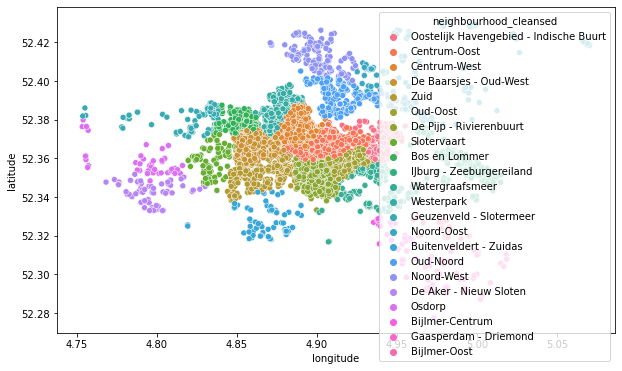

In [242]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_cleansed,legend='auto')
plt.ioff()

<function matplotlib.pyplot.show>

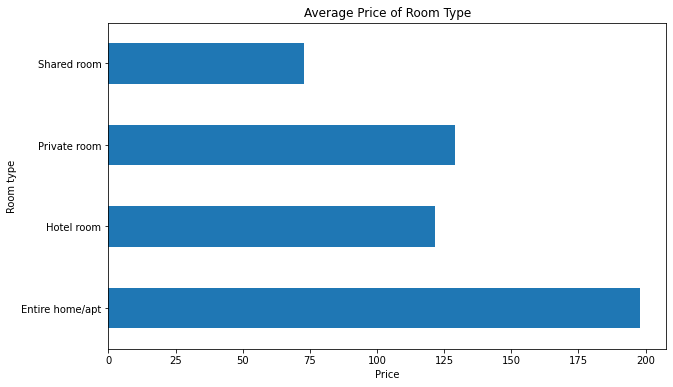

In [243]:
'''plot the average price for each room type'''
plt.figure(figsize = (10,6))
df.groupby('room_type')['price'].mean().plot(kind='barh')
plt.xlabel('Price')
plt.ylabel('Room type')
plt.title("Average Price of Room Type")
plt.show

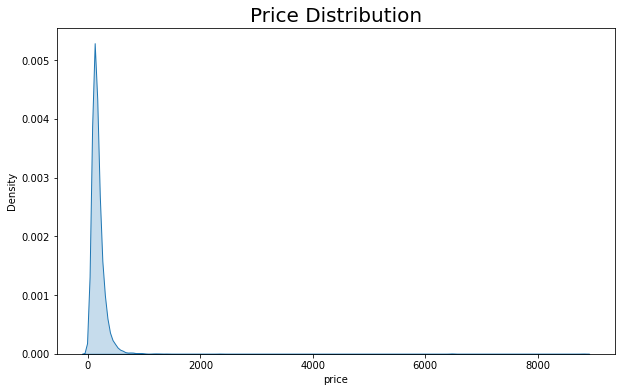

In [244]:
'''check price distribution'''
plt.figure(figsize = (10,6))
plt.title('Price Distribution',fontsize=20)
sns.kdeplot(df['price'], shade='True', legend='True')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


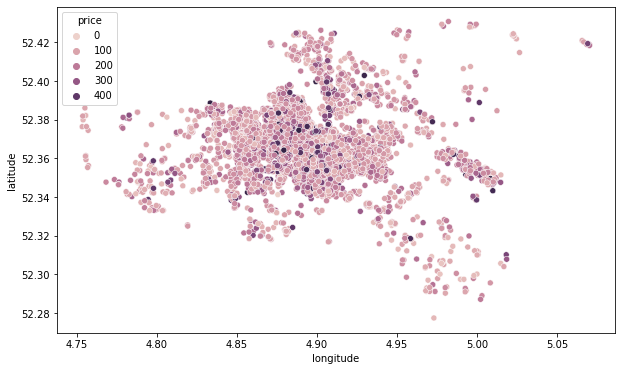

In [245]:
'''plot the price map of listing price < 500, we can see the distribution of prices more clearly'''
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df["price"][df["price"]<500])
plt.ioff()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


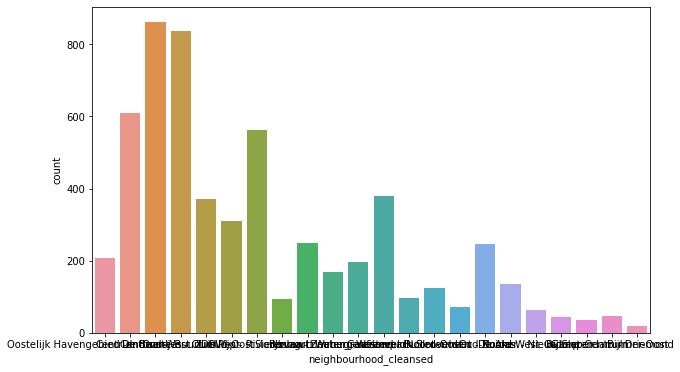

In [246]:
'''check neighbourhood_group variable'''
plt.figure(figsize = (10,6))
ax = sns.countplot(df.neighbourhood_cleansed)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


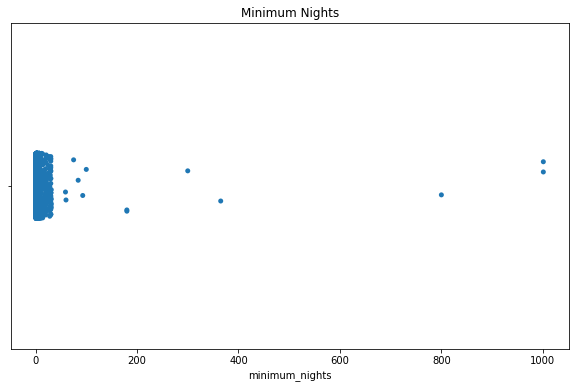

In [247]:
'''check minimum_nights variable'''
plt.figure(figsize = (10,6))
plt.title('Minimum Nights')
sns.stripplot(df['minimum_nights'])

In [248]:
df

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20220308023209,2022-03-08,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,...,4.98,4.68,4.82,0363 5F3A 5684 6750 D14D,t,1,0,1,0,1.81
1,20168,https://www.airbnb.com/rooms/20168,20220308023209,2022-03-31,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,59484,https://www.airbnb.com/users/show/59484,...,4.62,4.87,4.49,0363 CBB3 2C10 0C2A 1E29,t,2,0,2,0,2.30
2,27886,https://www.airbnb.com/rooms/27886,20220308023209,2022-03-08,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,https://www.airbnb.com/users/show/97647,...,4.92,4.89,4.79,0363 974D 4986 7411 88D8,t,1,0,1,0,1.84
3,28871,https://www.airbnb.com/rooms/28871,20220308023209,2022-03-08,Comfortable double room,<b>The space</b><br />In a monumental house ri...,"Flower market , Leidseplein , Rembrantsplein",https://a0.muscache.com/pictures/160889/362340...,124245,https://www.airbnb.com/users/show/124245,...,4.94,4.97,4.82,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,2.70
4,29051,https://www.airbnb.com/rooms/29051,20220308023209,2022-03-08,Comfortable single room,This room can also accomodate 2 people. For a...,the street is quite lively especially on weeke...,https://a0.muscache.com/pictures/162009/bd6be2...,124245,https://www.airbnb.com/users/show/124245,...,4.91,4.87,4.75,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,3.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5727,574423871863802609,https://www.airbnb.com/rooms/574423871863802609,20220308023209,2022-03-08,Ruim en licht appartement met zonnig balkon!,Het appartement ligt aan het beukenplein. Dit ...,NaN,https://a0.muscache.com/pictures/e5779b84-46b2...,41049115,https://www.airbnb.com/users/show/41049115,...,NaN,NaN,NaN,0363 3189 EB67 8753 5807,f,1,1,0,0,NaN
5728,574644866441306990,https://www.airbnb.com/rooms/574644866441306990,20220308023209,2022-03-08,Lovely ground floor Condo - near Rembrandtpark,"Near Rembrendt - Park in West Amsterdam, close...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,1029291,https://www.airbnb.com/users/show/1029291,...,NaN,NaN,NaN,0363 5520 DC2F 5CC4 08FB,f,1,1,0,0,NaN
5729,575042515086654943,https://www.airbnb.com/rooms/575042515086654943,20220308023209,2022-03-08,Lovely 1-bedroom apartment @Amstel River + garden,Enjoy Amsterdam and stay in this beautiful Sca...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,100996455,https://www.airbnb.com/users/show/100996455,...,NaN,NaN,NaN,0363 B14D 4AFE 1295 08DC,f,1,1,0,0,NaN
5730,575171723339932012,https://www.airbnb.com/rooms/575171723339932012,20220308023209,2022-03-08,Modern spacious apartment M22,The total surface of the apartment is 102 squa...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,447869666,https://www.airbnb.com/users/show/447869666,...,NaN,NaN,NaN,0363774E94B82542CB6A,t,1,1,0,0,NaN


In [249]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [250]:
not_interesting_cols = ['listing_url', 'scrape_id', 'last_scraped', 'description',
       'neighborhood_overview', 'picture_url', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'property_type', 'bathrooms',
       'bathrooms_text', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90', 'calendar_last_scraped',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review','review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location', 'license', 'instant_bookable',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms']

df1 = df.drop(not_interesting_cols, axis=1)

In [251]:
df2 = df1.drop(['neighbourhood_group_cleansed'], axis=1)

In [252]:
df2['amenities']

0       ["Shampoo", "Laundromat nearby", "Paid parking...
1       ["Essentials", "Hair dryer", "Hangers", "Dedic...
2       ["Shampoo", "Cable TV", "Laundromat nearby", "...
3       ["Refrigerator", "Shampoo", "Private entrance"...
4       ["Refrigerator", "Shampoo", "Private entrance"...
                              ...                        
5727    ["TV", "First aid kit", "Kitchen", "Fire extin...
5728    ["TV", "Kitchen", "Outdoor dining area", "Fire...
5729    ["TV", "Kitchen", "Outdoor dining area", "Long...
5730    ["TV", "Air conditioning", "First aid kit", "K...
5731    ["Shampoo", "Laundromat nearby", "Kitchen", "H...
Name: amenities, Length: 5732, dtype: object

In [253]:
df2.amenities[:1].values

array(['["Shampoo", "Laundromat nearby", "Paid parking off premises", "Clothing storage: wardrobe", "Hot water kettle", "Shower gel", "Carbon monoxide alarm", "Long term stays allowed", "Coffee maker", "Paid washer \\u2013 In unit", "Hot water", "Single level home", "Drying rack for clothing", "Security cameras on property", "Cleaning products", "Fire extinguisher", "Hair dryer", "Smoke alarm", "Pour-over coffee", "Dedicated workspace: table", "Room-darkening shades", "Mini fridge", "Ethernet connection", "First aid kit", "Portable fans", "Body soap", "Extra pillows and blankets", "Lock on bedroom door", "Bed linens", "Heating", "Mosquito net", "Iron", "Paid parking on premises", "Refrigerator", "Private entrance", "Fast wifi \\u2013 52 Mbps", "Essentials", "Outdoor furniture", "Host greets you", "Shared fenced garden or backyard", "Hangers"]'],
      dtype=object)

In [254]:
# Creating a set of all possible amenities
amenities_list = list(df.amenities)
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('{', '')
amenities_list_string = amenities_list_string.replace('}', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)
amenities_set

{'Siemsens Inductie electric stove',
 'Bose Soundtouch sound system with Bluetooth and aux',
 'Shared patio or balcony',
 'Whirlpool  induction stove',
 'JBLSound Bar Bluetooth sound system',
 'Washer \\u2013\\u00a0In unit',
 'Paid washer',
 'Savoire Fair shampoo',
 'Fitness center',
 'Fast wifi \\u2013 325 Mbps',
 'Essentials] [Shampoo',
 'Lake access',
 'Naamloos conditioner',
 'Paid parking lot on premises',
 'Free street parking] [Free street parking',
 'House brand conditioner',
 '.  conditioner',
 'Children\\u2019s books and toys for ages 2-5 years old and 10+ years old',
 'Microwave] [TV',
 'Wifi] [Dryer',
 'Clothing storage: wardrobe and walk-in closet',
 'Game console: PS2',
 'Handzeep body soap',
 'vloeibare handzeep body soap',
 'Dedicated workspace: table',
 'Paid washer \\u2013 In unit',
 'Bosch  electric stove',
 'House of Marley sound system with Bluetooth and aux',
 'Ping pong table',
 'Paid dryer \\u2013 In unit] [Refrigerator',
 '32\\ HDTV',
 'Washer] [Cooking basics'

In [255]:
df = df2

In [256]:
df.loc[df['amenities'].str.contains('24-hour check-in'), 'check_in_24h'] = 1
df.loc[df['amenities'].str.contains('Air conditioning|Central air conditioning'), 'air_conditioning'] = 1
df.loc[df['amenities'].str.contains('Amazon Echo|Apple TV|Game console|Netflix|Projector and screen|Smart TV'), 'high_end_electronics'] = 1
df.loc[df['amenities'].str.contains('BBQ grill|Fire pit|Propane barbeque'), 'bbq'] = 1
df.loc[df['amenities'].str.contains('Balcony|Patio'), 'balcony'] = 1
df.loc[df['amenities'].str.contains('Beach view|Beachfront|Lake access|Mountain view|Ski-in/Ski-out|Waterfront'), 'nature_and_views'] = 1
df.loc[df['amenities'].str.contains('Bed linens'), 'bed_linen'] = 1
df.loc[df['amenities'].str.contains('Breakfast'), 'breakfast'] = 1
df.loc[df['amenities'].str.contains('TV'), 'tv'] = 1
df.loc[df['amenities'].str.contains('Coffee maker|Espresso machine'), 'coffee_machine'] = 1
df.loc[df['amenities'].str.contains('Cooking basics'), 'cooking_basics'] = 1
df.loc[df['amenities'].str.contains('Dishwasher|Dryer|Washer'), 'white_goods'] = 1
df.loc[df['amenities'].str.contains('Elevator'), 'elevator'] = 1
df.loc[df['amenities'].str.contains('Exercise equipment|Gym|gym'), 'gym'] = 1
df.loc[df['amenities'].str.contains('Family/kid friendly|Children|children'), 'child_friendly'] = 1
df.loc[df['amenities'].str.contains('parking'), 'parking'] = 1
df.loc[df['amenities'].str.contains('Garden|Outdoor|Sun loungers|Terrace'), 'outdoor_space'] = 1
df.loc[df['amenities'].str.contains('Host greets you'), 'host_greeting'] = 1
df.loc[df['amenities'].str.contains('Hot tub|Jetted tub|hot tub|Sauna|Pool|pool'), 'hot_tub_sauna_or_pool'] = 1
df.loc[df['amenities'].str.contains('Internet|Pocket wifi|Wifi'), 'internet'] = 1
df.loc[df['amenities'].str.contains('Long term stays allowed'), 'long_term_stays'] = 1
df.loc[df['amenities'].str.contains('Pets|pet|Cat(s)|Dog(s)'), 'pets_allowed'] = 1
df.loc[df['amenities'].str.contains('Private entrance'), 'private_entrance'] = 1
df.loc[df['amenities'].str.contains('Safe|Security system'), 'secure'] = 1
df.loc[df['amenities'].str.contains('Self check-in'), 'self_check_in'] = 1
df.loc[df['amenities'].str.contains('Smoking allowed'), 'smoking_allowed'] = 1
df.loc[df['amenities'].str.contains('Step-free access|Wheelchair|Accessible'), 'accessible'] = 1
df.loc[df['amenities'].str.contains('Suitable for events'), 'event_suitable'] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


In [257]:
# Replacing nulls with zeros for new columns
cols_to_replace_nulls = df.iloc[:,41:].columns
df[cols_to_replace_nulls] = df[cols_to_replace_nulls].fillna(0)

# Produces a list of amenity features where one category (true or false) contains fewer than 10% of listings
infrequent_amenities = []
for col in df.iloc[:,41:].columns:
    if df[col].sum() < len(df)/10:
        infrequent_amenities.append(col)
print(infrequent_amenities)

# Dropping infrequent amenity features
df.drop(infrequent_amenities, axis=1, inplace=True)

# Dropping the original amenity feature
df.drop('amenities', axis=1, inplace=True)
df.drop('check_in_24h', axis=1, inplace=True)

['pets_allowed', 'secure', 'self_check_in', 'smoking_allowed', 'accessible', 'event_suitable']


In [258]:
df2 = df

In [259]:
df2.isnull().sum()

id                                   0
name                                 0
host_id                              0
neighbourhood                     1678
neighbourhood_cleansed               0
latitude                             0
longitude                            0
room_type                            0
accommodates                         0
bedrooms                           327
beds                               101
price                                0
minimum_nights                       0
maximum_nights                       0
availability_365                     0
number_of_reviews                    0
review_scores_rating               576
review_scores_accuracy             585
review_scores_value                585
calculated_host_listings_count       0
reviews_per_month                  576
air_conditioning                  5002
high_end_electronics              5323
bbq                               5050
balcony                           4458
nature_and_views         

In [260]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5732 entries, 0 to 5731
Data columns (total 42 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5732 non-null   int64  
 1   name                            5732 non-null   object 
 2   host_id                         5732 non-null   int64  
 3   neighbourhood                   4054 non-null   object 
 4   neighbourhood_cleansed          5732 non-null   object 
 5   latitude                        5732 non-null   float64
 6   longitude                       5732 non-null   float64
 7   room_type                       5732 non-null   object 
 8   accommodates                    5732 non-null   int64  
 9   bedrooms                        5405 non-null   float64
 10  beds                            5631 non-null   float64
 11  price                           5732 non-null   float64
 12  minimum_nights                  57

In [261]:
#Replace blanks with NaNs
data = df2.replace('_', np.nan)

In [262]:
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [263]:
numeric_features = data.select_dtypes(exclude=["category","object"]).columns.tolist()

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
data[numeric_features]  = imp.fit_transform(data[numeric_features])

categorical_features = data.select_dtypes(include=["object"]).columns.tolist()
imp1 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data[categorical_features]  = imp1.fit_transform(data[categorical_features])


In [264]:
data

,id,name,host_id,neighbourhood,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bedrooms,...,elevator,gym,child_friendly,parking,outdoor_space,host_greeting,hot_tub_sauna_or_pool,internet,long_term_stays,private_entrance
0,2.818000e+03,Quiet Garden View Room & Super Fast WiFi,3159.0,"Amsterdam, North Holland, Netherlands",Oostelijk Havengebied - Indische Buurt,52.364350,4.943580,Private room,2.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
1,2.016800e+04,Studio with private bathroom in the centre 1,59484.0,"Amsterdam, North Holland, Netherlands",Centrum-Oost,52.364070,4.893930,Private room,2.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,2.788600e+04,"Romantic, stylish B&B houseboat in canal district",97647.0,"Amsterdam, North Holland, Netherlands",Centrum-West,52.387610,4.891880,Private room,2.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,2.887100e+04,Comfortable double room,124245.0,"Amsterdam, North Holland, Netherlands",Centrum-West,52.367750,4.890920,Private room,2.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,2.905100e+04,Comfortable single room,124245.0,"Amsterdam, North Holland, Netherlands",Centrum-Oost,52.365840,4.891110,Private room,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5727,5.744239e+17,Ruim en licht appartement met zonnig balkon!,41049115.0,"Amsterdam, Noord-Holland, Netherlands",Oud-Oost,52.356550,4.919800,Entire home/apt,3.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
5728,5.746449e+17,Lovely ground floor Condo - near Rembrandtpark,1029291.0,"Amsterdam, Noord-Holland, Netherlands",Slotervaart,52.365220,4.837980,Entire home/apt,3.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
5729,5.750425e+17,Lovely 1-bedroom apartment @Amstel River + garden,100996455.0,"Amsterdam, Noord-Holland, Netherlands",Oud-Oost,52.349269,4.913563,Entire home/apt,2.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
5730,5.751717e+17,Modern spacious apartment M22,447869666.0,"Amsterdam, Noord-Holland, Netherlands",Centrum-West,52.376490,4.893809,Entire home/apt,6.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [265]:
data.iloc[:,3:].describe()

,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,...,elevator,gym,child_friendly,parking,outdoor_space,host_greeting,hot_tub_sauna_or_pool,internet,long_term_stays,private_entrance
count,5732.000000,5732.000000,5732.000000,5732.000000,5732.000000,5732.000000,5732.000000,5732.000000,5732.000000,5732.000000,...,5732.0,5732.0,5732.0,5732.0,5732.0,5732.0,5732.0,5732.000000,5732.000000,5732.000000
mean,52.366941,4.891896,2.954641,1.571138,1.963950,174.613922,3.893057,527.887125,98.579728,49.570830,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.972784,0.755757,0.466678
std,0.017964,0.038285,1.489931,0.893754,1.647515,200.142824,22.916330,522.817151,121.258191,90.739099,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.162725,0.429675,0.498932
min,52.277520,4.753340,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000
25%,52.356277,4.868655,2.000000,1.000000,1.000000,100.000000,2.000000,28.000000,0.000000,4.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,0.000000
50%,52.366470,4.888655,2.000000,1.000000,1.963950,145.000000,2.000000,365.000000,34.000000,17.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,0.000000
75%,52.376740,4.909320,4.000000,2.000000,2.000000,200.000000,3.000000,1125.000000,187.000000,48.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000
max,52.430760,5.070100,16.000000,15.000000,34.000000,8812.000000,1001.000000,1825.000000,365.000000,939.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000


In [266]:
'''To make a better statisticial analysis and to get better scores, 
we will have applied log transformation for the price column.'''
data['log_price'] = np.log(data.price+1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Log-Price Distribution Plot')

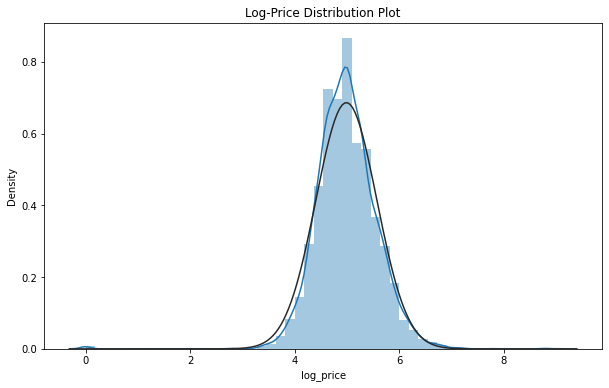

In [267]:
plt.figure(figsize=(10,6))
sns.distplot(data['log_price'], fit=norm)
plt.title("Log-Price Distribution Plot")

[(11.0, 0.0)]

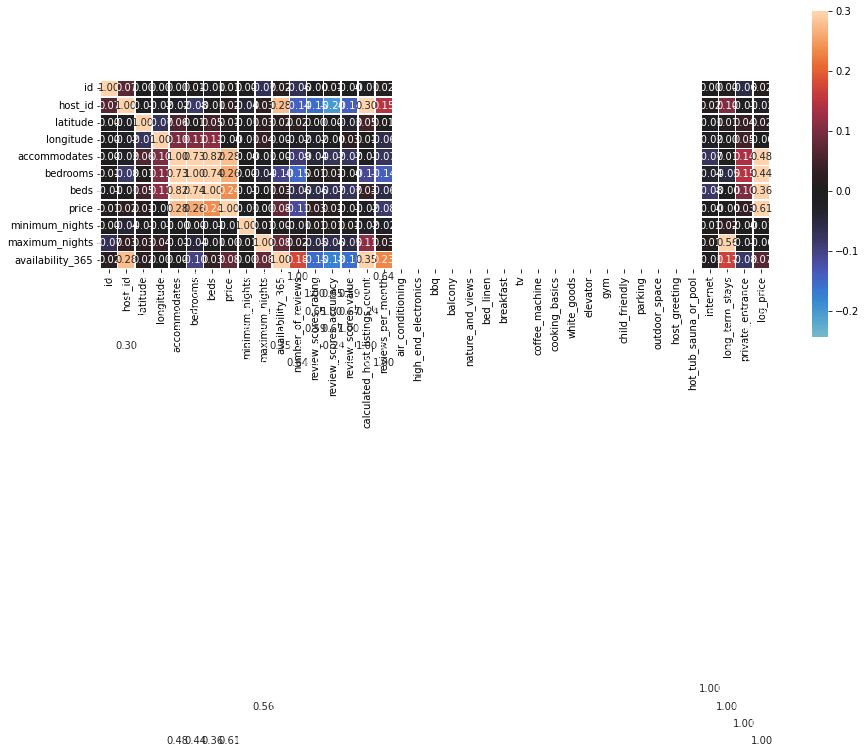

In [268]:
'''Correlation Matrix'''
plt.figure(figsize=(15,12))
corr=data.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt=".2f", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set(ylim=(11, 0))

In [269]:
data = data[data['availability_365'] != 0]
data.shape

(3937, 43)

In [270]:
data = data[data['price'] != 0]
data = data[data['number_of_reviews'] != 0]
data = data[data['review_scores_rating'].notnull()]
data.shape

(3507, 43)

In [271]:
def examine_missing_values(data):
    data_na= data.isnull().sum().sort_values(ascending=False)
    data_na_percent = (data.isnull().sum()/len(data)*100).sort_values(ascending=False)
    missing_data = pd.concat([data_na, data_na_percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [272]:
missing_data = examine_missing_values(data)
missing_data.head(20)

,Total,Percent
id,0,0.0
elevator,0,0.0
balcony,0,0.0
nature_and_views,0,0.0
bed_linen,0,0.0
breakfast,0,0.0
tv,0,0.0
coffee_machine,0,0.0
cooking_basics,0,0.0
white_goods,0,0.0


In [273]:
data['price']

0        49.0
2       134.0
3        75.0
4        55.0
6       140.0
        ...  
5694    149.0
5695    149.0
5697     38.0
5702    120.0
5703    125.0
Name: price, Length: 3507, dtype: float64

In [274]:
data = data.drop('neighbourhood', axis=1)

In [275]:
data.rename(columns = {'neighbourhood_cleansed':'neighbourhood'}, inplace = True)

In [276]:
data.rename(columns = {'id':'listing_id'}, inplace = True)

In [277]:
features = data
print(features.shape)
features.head()

(3507, 42)


,listing_id,name,host_id,neighbourhood,latitude,longitude,room_type,accommodates,bedrooms,beds,...,gym,child_friendly,parking,outdoor_space,host_greeting,hot_tub_sauna_or_pool,internet,long_term_stays,private_entrance,log_price
0,2818.0,Quiet Garden View Room & Super Fast WiFi,3159.0,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,2.0,1.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,3.912023
2,27886.0,"Romantic, stylish B&B houseboat in canal district",97647.0,Centrum-West,52.38761,4.89188,Private room,2.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.905275
3,28871.0,Comfortable double room,124245.0,Centrum-West,52.36775,4.89092,Private room,2.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.330733
4,29051.0,Comfortable single room,124245.0,Centrum-Oost,52.36584,4.89111,Private room,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.025352
6,47061.0,Charming apartment in old centre,211696.0,De Baarsjes - Oud-West,52.36786,4.87458,Entire home/apt,3.0,2.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.948760


Correct highly skewed numerical features
The skewed distribution has the following disadvantages:

Highly skewed distributions are difficult to examine because most of the observations are confined to a small part of the range of the data.
Outlying values in the direction of the skew are brought in toward the main body of the data when the distribution is made more symmetric.
For the features with high skewness, I uesed box-cox transformation to correct the non-normal distribution while maintaining the information.

In [278]:
# from scipy.stats import skew, boxcox_normmax
# from scipy.special import boxcox1p
# skew_features = features[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)
# high_skew = skew_features[skew_features > 0.5]
# skew_index = high_skew.index

# for i in skew_index:
#     features[i] = boxcox1p(features[i], boxcox_normmax(features[i] + 1))

In [279]:
features['price']

0        49.0
2       134.0
3        75.0
4        55.0
6       140.0
        ...  
5694    149.0
5695    149.0
5697     38.0
5702    120.0
5703    125.0
Name: price, Length: 3507, dtype: float64

In [280]:
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt

def check_dist(price):
    print('Checking the statistical distribution of prices')
    print(price.describe())
    
    print('Fitting the prices into normal distribution')
    sns.distplot(price, fit=norm)

    # Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(price)
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

    #Now plot the distribution
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
                loc='best')
    plt.ylabel('Frequency')
    plt.title('Price distribution')

    #Get also the QQ-plot
    fig = plt.figure()
    res = stats.probplot(price, plot=plt)
    plt.show()

Checking the statistical distribution of prices
count    3507.000000
mean      175.264899
std       184.882293
min        26.000000
25%       100.000000
50%       145.000000
75%       202.000000
max      8812.000000
Name: price, dtype: float64
Fitting the prices into normal distribution

 mu = 175.26 and sigma = 184.86



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


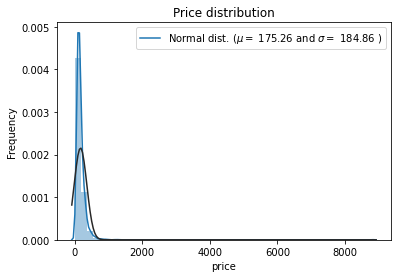

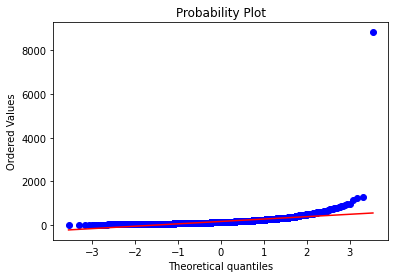

In [281]:
check_dist(features['price'])

In [282]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [283]:
import geopandas as gpd
geo_ams = gpd.read_file('/content/drive/MyDrive/AMS-Airbnb-price-prediction/data/neighbourhoods.geojson')

In [284]:
geo_ams["longitude"] = geo_ams.centroid.x
geo_ams["latitude"] = geo_ams.centroid.y
geo_ams.drop('neighbourhood_group', axis=1, inplace=True)
geo_ams

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


,neighbourhood,geometry,longitude,latitude
0,Bijlmer-Oost,"MULTIPOLYGON Z (((4.99167 52.32444 43.06929, 4...",4.977317,52.320279
1,Noord-Oost,"MULTIPOLYGON Z (((5.07916 52.38865 42.95663, 5...",5.003523,52.398339
2,Noord-West,"MULTIPOLYGON Z (((4.93072 52.41161 42.91539, 4...",4.894589,52.415306
3,Oud-Noord,"MULTIPOLYGON Z (((4.95242 52.38983 42.95411, 4...",4.910489,52.394068
4,IJburg - Zeeburgereiland,"MULTIPOLYGON Z (((5.03906 52.35458 43.01664, 5...",4.998377,52.360899
5,Centrum-West,"MULTIPOLYGON Z (((4.90640 52.38004 42.97078, 4...",4.889084,52.376426
6,Oostelijk Havengebied - Indische Buurt,"MULTIPOLYGON Z (((4.96131 52.35913 43.00823, 4...",4.941492,52.371412
7,Centrum-Oost,"MULTIPOLYGON Z (((4.93297 52.37041 42.98810, 4...",4.908287,52.367753
8,Oud-Oost,"MULTIPOLYGON Z (((4.93743 52.35774 43.01043, 4...",4.919954,52.357795
9,Watergraafsmeer,"MULTIPOLYGON Z (((4.96971 52.35636 43.01317, 4...",4.931061,52.342719


In [285]:
# # Creating a dataframe of listing counts and median price by borough
# borough_df = pd.DataFrame(features.groupby('neighbourhood').size())
# borough_df['median_price'] = features.groupby('neighbourhood').price.median().values

# # Joining the dataframes
# borough_map_df = geo_ams.set_index('neighbourhood').join(borough_df)

# borough_map_df.head()

In [286]:
# # Plotting the median price of listings in each borough
# fig2, ax2 = plt.subplots(1, figsize=(15, 6))
# borough_map_df.plot(column='median_price', cmap='Reds', ax=ax2)
# ax2.axis('off')
# ax2.set_title('Median price of Airbnb listings in each Amsterdam neighbourhood', fontsize=14)
# sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=min(borough_map_df.median_price), vmax=max(borough_map_df.median_price)))
# sm._A = [] # Creates an empty array for the data range
# cbar = fig2.colorbar(sm)
# plt.show()

In [287]:
neighbourhood_price = features.groupby('neighbourhood').median()['price']
neighbourhood_price = pd.DataFrame({'neighbourhood':neighbourhood_price.index, 'price': neighbourhood_price.T.values})
neighbourhood_price.sort_values('price', ascending=False, inplace=True)
neighbourhood_price.head()

,neighbourhood,price
4,Centrum-Oost,160.0
8,De Pijp - Rivierenbuurt,160.0
21,Zuid,153.0
20,Westerpark,150.0
11,IJburg - Zeeburgereiland,150.0


In [341]:
map_ams_price = folium.Map(location=[latitude, longitude], zoom_start=12)
map_ams_price.choropleth(
    geo_data=r'/content/drive/MyDrive/AMS-Airbnb-price-prediction/data/neighbourhoods.geojson',
    data=neighbourhood_price,
    columns=['neighbourhood', 'price'],
    key_on='feature.properties.neighbourhood',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='The average_price',
    reset=True,
)
map_ams_price
#map_ams_price.save('map_ams_price.html')

/usr/local/lib/python3.7/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [289]:
features.head()

,listing_id,name,host_id,neighbourhood,latitude,longitude,room_type,accommodates,bedrooms,beds,...,gym,child_friendly,parking,outdoor_space,host_greeting,hot_tub_sauna_or_pool,internet,long_term_stays,private_entrance,log_price
0,2818.0,Quiet Garden View Room & Super Fast WiFi,3159.0,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,2.0,1.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,3.912023
2,27886.0,"Romantic, stylish B&B houseboat in canal district",97647.0,Centrum-West,52.38761,4.89188,Private room,2.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.905275
3,28871.0,Comfortable double room,124245.0,Centrum-West,52.36775,4.89092,Private room,2.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.330733
4,29051.0,Comfortable single room,124245.0,Centrum-Oost,52.36584,4.89111,Private room,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.025352
6,47061.0,Charming apartment in old centre,211696.0,De Baarsjes - Oud-West,52.36786,4.87458,Entire home/apt,3.0,2.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.948760


In [290]:
reviews_df = pd.read_csv('/content/drive/MyDrive/AMS-Airbnb-price-prediction/data/reviews.csv')

Now let's remove punctuation, digits and special characters.


In [291]:
import re
def remove_punctuation_digits_specialchar(line):
    return re.sub('[^A-Za-z]+', ' ', line).lower()

features['name'] = features['name'].apply(remove_punctuation_digits_specialchar)
# Let's compare raw and cleaned texts.
#mydata[['name', 'clean_name']].head()

In [292]:
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,653459,182754517,2017-08-15,137969888,Anne-Marie,"La maison de Derk est spacieuse, luxieusement ..."
1,653459,186006032,2017-08-23,14433331,Orit,"A great house, kids friendly.<br/>Very good lo..."
2,653459,224528889,2018-01-03,14788768,Virginie,"La maison ainsi que ses hôtes nous a ravit, co..."
3,653459,225700435,2018-01-07,89981144,Jonas,The contact with Derk was very pleasant and he...
4,653459,263100622,2018-05-11,34424860,Pierre,Even if some plane rarely flight above the app...


Now let's remove stop words

In [293]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [294]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.util import ngrams

from nltk.corpus import stopwords


def tokenize_no_stopwords(line):
    tokens = nltk.tokenize.word_tokenize(line)
    tokens_no_stop = [w for w in tokens if w not in stopwords.words('english')]
    return " ".join(tokens_no_stop)

features['name'] = features['name'].apply(tokenize_no_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [295]:
def preprocess_text(text: str, remove_stopwords: bool) -> str:
    """This utility function sanitizes a string by:
    - removing stopwords
    - transforming in lowercase
    - removing excessive whitespaces
    Args:
        text (str): the input text you want to clean
        remove_stopwords (bool): whether or not to remove stopwords
    Returns:
        str: the cleaned text
    """

    # remove stopwords
    if remove_stopwords:
        # 1. tokenize
        tokens = nltk.word_tokenize(text)
        # 2. check if stopword
        tokens = [w for w in tokens if not w.lower() in nltk.corpus.stopwords.words('english')]
        # 3. join back together
        text = " ".join(tokens)
    # return text in lower case and stripped of whitespaces
    text = text.lower().strip()
    return text

reviews_df = reviews_df[:1000]
reviews_df['comments'] = reviews_df['comments'].apply(lambda x: preprocess_text(x, remove_stopwords=True))
reviews_df['comments'] = reviews_df['comments'].apply(tokenize_no_stopwords)
reviews_df['comments'] = reviews_df['comments'].apply(remove_punctuation_digits_specialchar)
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,653459,182754517,2017-08-15,137969888,Anne-Marie,la maison de derk est spacieuse luxieusement q...
1,653459,186006032,2017-08-23,14433331,Orit,great house kids friendly br good location clo...
2,653459,224528889,2018-01-03,14788768,Virginie,la maison ainsi que ses h tes nous ravit conte...
3,653459,225700435,2018-01-07,89981144,Jonas,contact derk pleasant helpful house perfectly ...
4,653459,263100622,2018-05-11,34424860,Pierre,even plane rarely flight appartment s great pl...


In [296]:
from textblob import TextBlob

def getSubjectivity(text):
    TextBlob(text).sentiment.subjectivity
    
def getPolarity(text):
    TextBlob(text).sentiment.polarity

reviews_df['Subjectivity'] = reviews_df['comments'].apply(getSubjectivity)
reviews_df['Polarity'] = reviews_df['comments'].apply(getPolarity)

#TextBlob(new['subject'][0]).sentiment.polarity
for i in range(len(reviews_df['comments'])):

    reviews_df['Subjectivity'][i] = TextBlob(reviews_df['comments'][i]).sentiment.subjectivity
    reviews_df['Polarity'][i] = TextBlob(reviews_df['comments'][i]).sentiment.polarity

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [297]:
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,Subjectivity,Polarity
0,653459,182754517,2017-08-15,137969888,Anne-Marie,la maison de derk est spacieuse luxieusement q...,0.666667,0.333333
1,653459,186006032,2017-08-23,14433331,Orit,great house kids friendly br good location clo...,0.4875,0.46875
2,653459,224528889,2018-01-03,14788768,Virginie,la maison ainsi que ses h tes nous ravit conte...,0.0,0.0
3,653459,225700435,2018-01-07,89981144,Jonas,contact derk pleasant helpful house perfectly ...,0.654167,0.345833
4,653459,263100622,2018-05-11,34424860,Pierre,even plane rarely flight appartment s great pl...,0.375,0.175


In [298]:
features.to_csv('listings_cleaned.csv')

In [299]:
reviews_df.to_csv('reviews_cleaned.csv')

In [300]:
features.columns

Index(['listing_id', 'name', 'host_id', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'accommodates', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_value', 'calculated_host_listings_count',
       'reviews_per_month', 'air_conditioning', 'high_end_electronics', 'bbq',
       'balcony', 'nature_and_views', 'bed_linen', 'breakfast', 'tv',
       'coffee_machine', 'cooking_basics', 'white_goods', 'elevator', 'gym',
       'child_friendly', 'parking', 'outdoor_space', 'host_greeting',
       'hot_tub_sauna_or_pool', 'internet', 'long_term_stays',
       'private_entrance', 'log_price'],
      dtype='object')

In [301]:
features = features[features['price']<2000]

In [302]:
def correct_dist(price):
    price = np.log1p(price)

    #Check the new distribution 
    sns.distplot(price , fit=norm);

    # Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(price)
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

    #Now plot the distribution
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
                loc='best')
    plt.ylabel('Frequency')
    plt.title('Price distribution')

    #Get also the QQ-plot
    fig = plt.figure()
    res = stats.probplot(price, plot=plt)
    plt.show()
    return price

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 5.00 and sigma = 0.55



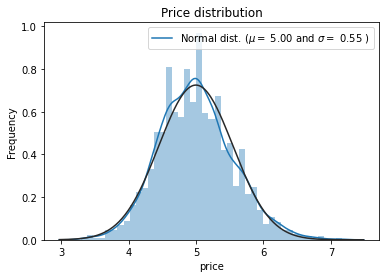

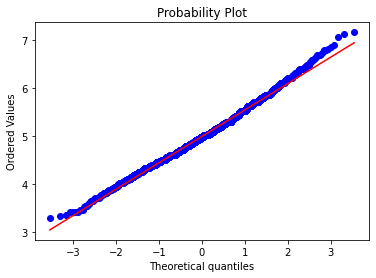

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [303]:
features['corrected_price'] = correct_dist(features['price'])

In [304]:
category_features = list(features.dtypes[features.dtypes == 'object'].index)
category_features.remove('name')
category_features

['neighbourhood', 'room_type']

In [305]:
def one_hot_encode(data, columns):
    onehot = pd.get_dummies(data[columns])
    onehot['listing_id'] = data['listing_id']
    # move id column to the first column
    fixed_columns = [onehot.columns[-1]] + list(onehot.columns[:-1])
    onehot = onehot[fixed_columns]
    return onehot

In [306]:
features_onehot = one_hot_encode(features, category_features)
features_onehot.head()

,listing_id,neighbourhood_Bijlmer-Centrum,neighbourhood_Bijlmer-Oost,neighbourhood_Bos en Lommer,neighbourhood_Buitenveldert - Zuidas,neighbourhood_Centrum-Oost,neighbourhood_Centrum-West,neighbourhood_De Aker - Nieuw Sloten,neighbourhood_De Baarsjes - Oud-West,neighbourhood_De Pijp - Rivierenbuurt,...,neighbourhood_Oud-Noord,neighbourhood_Oud-Oost,neighbourhood_Slotervaart,neighbourhood_Watergraafsmeer,neighbourhood_Westerpark,neighbourhood_Zuid,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,2818.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,27886.0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,28871.0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,29051.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,47061.0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [307]:
features_merged_dummy = pd.merge(features, features_onehot)
features_merged_dummy.head()

,listing_id,name,host_id,neighbourhood,latitude,longitude,room_type,accommodates,bedrooms,beds,...,neighbourhood_Oud-Noord,neighbourhood_Oud-Oost,neighbourhood_Slotervaart,neighbourhood_Watergraafsmeer,neighbourhood_Westerpark,neighbourhood_Zuid,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,2818.0,quiet garden view room super fast wifi,3159.0,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,2.0,1.0,2.0,...,0,0,0,0,0,0,0,0,1,0
1,27886.0,romantic stylish b b houseboat canal district,97647.0,Centrum-West,52.38761,4.89188,Private room,2.0,1.0,1.0,...,0,0,0,0,0,0,0,0,1,0
2,28871.0,comfortable double room,124245.0,Centrum-West,52.36775,4.89092,Private room,2.0,1.0,1.0,...,0,0,0,0,0,0,0,0,1,0
3,29051.0,comfortable single room,124245.0,Centrum-Oost,52.36584,4.89111,Private room,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,1,0
4,47061.0,charming apartment old centre,211696.0,De Baarsjes - Oud-West,52.36786,4.87458,Entire home/apt,3.0,2.0,2.0,...,0,0,0,0,0,0,1,0,0,0


In [308]:
features_merged_dummy.drop(category_features, axis=1, inplace=True)
features_final = features_merged_dummy

In [309]:
y = features_final['corrected_price']
X = features_final.drop(['listing_id', 'name', 'latitude', 'longitude', 'price', 'corrected_price', 'log_price'], axis=1)
X.shape, y.shape

((3506, 60), (3506,))

In [310]:
overfit = []
for i in X.columns:
    counts = X[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(X) * 100 > 95:
        overfit.append(i)
overfit

['air_conditioning',
 'high_end_electronics',
 'bbq',
 'balcony',
 'nature_and_views',
 'bed_linen',
 'breakfast',
 'tv',
 'coffee_machine',
 'cooking_basics',
 'white_goods',
 'elevator',
 'gym',
 'child_friendly',
 'parking',
 'outdoor_space',
 'host_greeting',
 'hot_tub_sauna_or_pool',
 'internet',
 'neighbourhood_Bijlmer-Centrum',
 'neighbourhood_Bijlmer-Oost',
 'neighbourhood_Bos en Lommer',
 'neighbourhood_Buitenveldert - Zuidas',
 'neighbourhood_De Aker - Nieuw Sloten',
 'neighbourhood_Gaasperdam - Driemond',
 'neighbourhood_Geuzenveld - Slotermeer',
 'neighbourhood_IJburg - Zeeburgereiland',
 'neighbourhood_Noord-Oost',
 'neighbourhood_Noord-West',
 'neighbourhood_Oostelijk Havengebied - Indische Buurt',
 'neighbourhood_Osdorp',
 'neighbourhood_Oud-Noord',
 'neighbourhood_Oud-Oost',
 'neighbourhood_Slotervaart',
 'neighbourhood_Watergraafsmeer',
 'room_type_Hotel room',
 'room_type_Shared room']

In [311]:
X.drop(overfit, axis=1, inplace=True)
X.shape

(3506, 23)

In [312]:
X.columns

Index(['host_id', 'accommodates', 'bedrooms', 'beds', 'minimum_nights',
       'maximum_nights', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy', 'review_scores_value',
       'calculated_host_listings_count', 'reviews_per_month',
       'long_term_stays', 'private_entrance', 'neighbourhood_Centrum-Oost',
       'neighbourhood_Centrum-West', 'neighbourhood_De Baarsjes - Oud-West',
       'neighbourhood_De Pijp - Rivierenbuurt', 'neighbourhood_Westerpark',
       'neighbourhood_Zuid', 'room_type_Entire home/apt',
       'room_type_Private room'],
      dtype='object')

In [313]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [314]:
X_test

,host_id,accommodates,bedrooms,beds,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,...,long_term_stays,private_entrance,neighbourhood_Centrum-Oost,neighbourhood_Centrum-West,neighbourhood_De Baarsjes - Oud-West,neighbourhood_De Pijp - Rivierenbuurt,neighbourhood_Westerpark,neighbourhood_Zuid,room_type_Entire home/apt,room_type_Private room
2429,15996910.0,2.0,1.571138,1.0,2.0,1125.0,44.0,45.0,4.76,4.76,...,1.0,1.0,1,0,0,0,0,0,0,1
3283,2587257.0,4.0,2.000000,2.0,2.0,365.0,1.0,3.0,5.00,5.00,...,1.0,0.0,0,0,1,0,0,0,1,0
2614,314410560.0,3.0,2.000000,2.0,2.0,7.0,22.0,22.0,4.86,4.91,...,0.0,0.0,0,0,0,0,0,0,0,1
2279,176320082.0,2.0,1.000000,2.0,1.0,200.0,296.0,182.0,4.49,4.64,...,1.0,0.0,1,0,0,0,0,0,0,1
1165,24892437.0,2.0,1.000000,2.0,4.0,8.0,104.0,28.0,4.96,5.00,...,0.0,0.0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,9482781.0,2.0,1.000000,1.0,3.0,65.0,14.0,51.0,4.53,4.67,...,1.0,0.0,0,0,0,1,0,0,1,0
1005,68631974.0,4.0,1.000000,2.0,2.0,30.0,115.0,4.0,5.00,5.00,...,1.0,0.0,0,0,0,0,0,0,1,0
689,11319500.0,2.0,1.000000,2.0,3.0,1125.0,181.0,362.0,4.85,4.88,...,1.0,1.0,0,1,0,0,0,0,0,1
1779,144967618.0,6.0,1.000000,5.0,2.0,1125.0,206.0,35.0,4.77,4.80,...,1.0,1.0,0,0,0,0,0,0,0,1


In [315]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error

# Root Mean Squared Logarithmic Error ，RMSLE
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=10))
    return (rmse)

In [316]:
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [317]:
#GradientBoosting
gbr = GradientBoostingRegressor(n_estimators=3000)

In [318]:
#xgboost（
xgb = XGBRegressor(learning_rate=0.01, 
                   booster='gbtree',
                   objective='reg:linear',
                   eval_metric='rmse',
                   max_depth=3,
                   min_child_weight=0,
                   n_estimators=3000)

In [319]:
print('GradientBoosting')
model_gbr = gbr.fit(X_train, y_train)

GradientBoosting


In [320]:
print('xgboost')
model_xgb = xgb.fit(X_train, y_train)

xgboost
[12:08:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [321]:
# print('gbr', rmsle(y_train, model_gbr.predict(X_train)))
# print('xgb', rmsle(y_train, model_xgb.predict(X_train)))

In [322]:
print('gbr', rmsle(y_test, model_gbr.predict(X_test)))
print('xgb', rmsle(y_test, model_xgb.predict(X_test)))

gbr 0.35812405234022987
xgb 0.34549573700047825


In [323]:
y_pred = model_xgb.predict(X_test)

In [324]:
y_test, y_pred

(2429    4.430817
 3283    5.017280
 2614    4.189655
 2279    4.204693
 1165    4.382027
           ...   
 763     5.303305
 1005    4.753590
 689     4.564348
 1779    4.330733
 3352    4.510860
 Name: corrected_price, Length: 702, dtype: float64,
 array([4.545614 , 5.362808 , 4.6907396, 4.6928477, 4.906917 , 5.0854044,
        5.248496 , 4.8279223, 4.2969275, 4.6065145, 5.1884995, 4.5381517,
        4.9873624, 5.0153027, 4.921023 , 4.390839 , 3.8569212, 4.85669  ,
        4.8445406, 5.0276117, 5.3656693, 4.619721 , 5.2899423, 5.215512 ,
        5.2667065, 5.3621044, 4.922236 , 5.6446886, 4.3206635, 4.3385406,
        4.723228 , 5.4832106, 5.4239798, 5.1798263, 4.8382773, 4.6656528,
        4.7023797, 4.69326  , 5.0755167, 5.058741 , 4.924836 , 4.645824 ,
        5.7207513, 4.564232 , 4.355589 , 4.907959 , 4.231763 , 5.466816 ,
        5.386941 , 4.1196632, 5.133884 , 5.2742224, 5.186004 , 5.5003743,
        4.769271 , 5.662106 , 4.6127276, 5.4166174, 4.973659 , 5.6233225,
        4

In [325]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6135292829053458

In [326]:
print('RMSE:{:.3f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

RMSE:0.345


In [155]:
# from sklearn.linear_model import Lasso, Ridge, ElasticNet

# elasticnet = ElasticNet()

In [156]:
# model_elastic = elasticnet.fit(X_train, y_train)

In [157]:
# y_pred = model_elastic.predict(X_test)

In [158]:
# print('RMSE:{:.3f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

In [327]:
ft_weights_xgb_reg = pd.DataFrame(model_xgb.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True)
ft_weights_xgb_reg

,weight
long_term_stays,0.000000
maximum_nights,0.006675
host_id,0.008234
private_entrance,0.009243
review_scores_accuracy,0.010550
neighbourhood_Westerpark,0.010772
review_scores_value,0.010960
neighbourhood_Zuid,0.012279
beds,0.014458
neighbourhood_De Baarsjes - Oud-West,0.015017


In [328]:
X_train.columns

Index(['host_id', 'accommodates', 'bedrooms', 'beds', 'minimum_nights',
       'maximum_nights', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy', 'review_scores_value',
       'calculated_host_listings_count', 'reviews_per_month',
       'long_term_stays', 'private_entrance', 'neighbourhood_Centrum-Oost',
       'neighbourhood_Centrum-West', 'neighbourhood_De Baarsjes - Oud-West',
       'neighbourhood_De Pijp - Rivierenbuurt', 'neighbourhood_Westerpark',
       'neighbourhood_Zuid', 'room_type_Entire home/apt',
       'room_type_Private room'],
      dtype='object')

In [329]:
X_train['bedrooms']

1804    1.000000
1609    1.000000
378     2.000000
2142    3.000000
1461    2.000000
          ...   
866     1.000000
2790    1.571138
74      1.000000
2224    1.000000
338     3.000000
Name: bedrooms, Length: 2804, dtype: float64

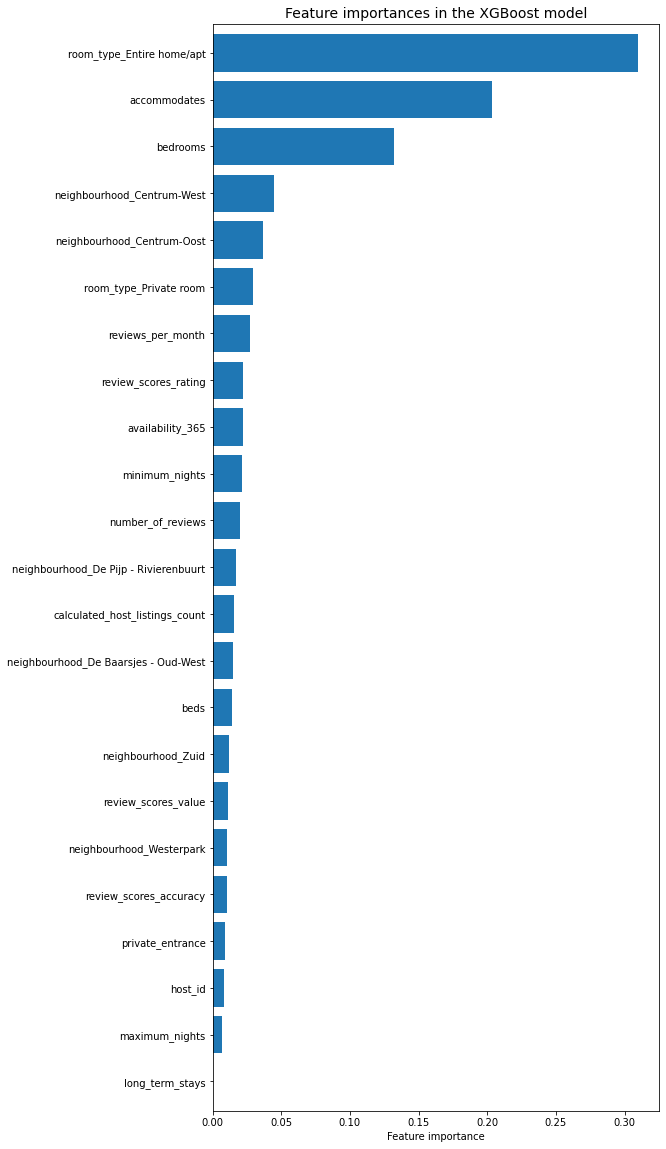

In [330]:
# Plotting feature importances
plt.figure(figsize=(8,20))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center')
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()